In this exercise, we'll use data from my first month using my fitbit to determine if time spent doing moderate and intense cardio had an impact on my quality of sleep the following night.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import the cardio activity data, which is separated by month
activeSepData = pd.read_csv('/Users/madelineyoung/Desktop/FitBitData/Active Zone Minutes - 2023-09-12.csv')
activeOctData = pd.read_csv('/Users/madelineyoung/Desktop/FitBitData/Active Zone Minutes - 2023-10-01.csv')

# make sure that these both have the same columns
activeSepData.head()
activeOctData.head()

# concatenate the dataframes
activeData = pd.concat([activeSepData, activeOctData], ignore_index=True, sort=False)
activeData.head()
activeData.tail()

,date_time,heart_zone_id,total_minutes
1241,2023-10-12T16:08,FAT_BURN,1
1242,2023-10-12T16:09,FAT_BURN,1
1243,2023-10-12T16:10,FAT_BURN,1
1244,2023-10-12T16:11,FAT_BURN,1
1245,2023-10-12T16:12,FAT_BURN,1


In [2]:
# import the sleep quality data
sleepData = pd.read_csv('/Users/madelineyoung/Desktop/FitBitData/sleep_score.csv')

sleepData.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,43098331486,2023-10-12T07:57:30Z,91,22,23,46,104,57,0.053723
1,43089173623,2023-10-11T09:55:30Z,90,22,22,46,104,56,0.058261
2,43075197771,2023-10-10T08:05:30Z,81,19,22,40,73,58,0.075875
3,43062649440,2023-10-09T09:30:30Z,86,19,21,46,80,59,0.080983
4,43051471563,2023-10-08T12:13:30Z,86,21,19,46,86,57,0.050984


We notice that for the sleep dataset, there is one timestamp per day. We are just interested in extracting the day from this. Lets see if the dates for September are formatted "09" or "9", so we can determine if we'll be able to use string indexing to extract the date.

In [3]:
sleepData.tail()
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sleep_log_entry_id     30 non-null     int64  
 1   timestamp              30 non-null     object 
 2   overall_score          30 non-null     int64  
 3   composition_score      30 non-null     int64  
 4   revitalization_score   30 non-null     int64  
 5   duration_score         30 non-null     int64  
 6   deep_sleep_in_minutes  30 non-null     int64  
 7   resting_heart_rate     30 non-null     int64  
 8   restlessness           30 non-null     float64
dtypes: float64(1), int64(7), object(1)
memory usage: 2.2+ KB


Because single digit months are formatted as 2 digits, it looks like we can use string indexing to extract the dates.

In [4]:
timestamps = sleepData['timestamp']
dates = []

for t in timestamps:
    year_month_day = t[0:10]
    dates.append(year_month_day)

sleepData['timestamp'] = dates

sleepData.head()

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,43098331486,2023-10-12,91,22,23,46,104,57,0.053723
1,43089173623,2023-10-11,90,22,22,46,104,56,0.058261
2,43075197771,2023-10-10,81,19,22,40,73,58,0.075875
3,43062649440,2023-10-09,86,19,21,46,80,59,0.080983
4,43051471563,2023-10-08,86,21,19,46,86,57,0.050984


For the activity data sets, the timestamps correspond to each minute with cardio activity. Again, we are just interested in extracting the date from this. 

In [5]:
activeData.rename(columns={'date_time': 'timestamp'}, inplace=True)

timestamps2 = activeData['timestamp']
dates = []

for t in timestamps2:
    year_month_day = t[0:10]
    dates.append(year_month_day)

activeData['timestamp'] = dates

activeData.head()

,timestamp,heart_zone_id,total_minutes
0,2023-09-12,FAT_BURN,1
1,2023-09-12,FAT_BURN,1
2,2023-09-12,FAT_BURN,1
3,2023-09-12,FAT_BURN,1
4,2023-09-12,FAT_BURN,1


In [6]:
print(activeData['heart_zone_id'].unique())

['FAT_BURN' 'CARDIO' 'PEAK']


Now that we have the timestamps formatted the same way in each dataset, let's sum the minutes spent in each zone per day. 

In [7]:
unique_dates = activeData['timestamp'].unique()

activeDataSums = {'timestamp': [], 'fat_burn': [], 'cardio': [], 'peak': []}

for u in unique_dates:
    # sum the FAT_BURN minutes first 
    fat_burn_bool = (activeData['heart_zone_id'] == 'FAT_BURN') & (activeData['timestamp'] == u)
    fat_burn = 0 + sum(activeData[fat_burn_bool]['total_minutes'])
    cardio_bool = (activeData['heart_zone_id'] == 'CARDIO') & (activeData['timestamp'] == u)
    cardio = 0 + sum(activeData[cardio_bool]['total_minutes'])
    peak_bool = (activeData['heart_zone_id'] == 'PEAK') & (activeData['timestamp'] == u)
    peak = 0 + sum(activeData[peak_bool]['total_minutes'])
    activeDataSums['timestamp'].append(u)
    activeDataSums['fat_burn'].append(fat_burn)
    activeDataSums['cardio'].append(cardio)
    activeDataSums['peak'].append(peak)
    
activeDataSums = pd.DataFrame(data=activeDataSums)
activeDataSums.tail(10)

# check that all data is accounted for
sum1 = sum(activeData['total_minutes'])
sum2 = sum(activeDataSums['fat_burn']) + sum(activeDataSums['cardio']) + sum(activeDataSums['peak'])
print(sum1)
print(sum2)

1374
1374


In [32]:
print(len(activeDataSums))
print(len(sleepData))

# Remove today's exercise, since it doesn't have a corresponding night of sleep
activeDataSums.drop(30)

# concatenate the datasets
combined = pd.merge(left=sleepData, right=activeDataSums, on='timestamp')
combined['total heart zones'] = combined['fat_burn'] + combined['cardio'] + combined['peak']
combined['upper heart zones'] = combined['cardio'] + combined['peak']
print(len(combined))

31
30
30


<ipython-input-38-488e6fbaee23>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(7,2,1)
<ipython-input-38-488e6fbaee23>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(7,2,2)
<ipython-input-38-488e6fbaee23>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

Text(0, 0.5, 'restlessness')

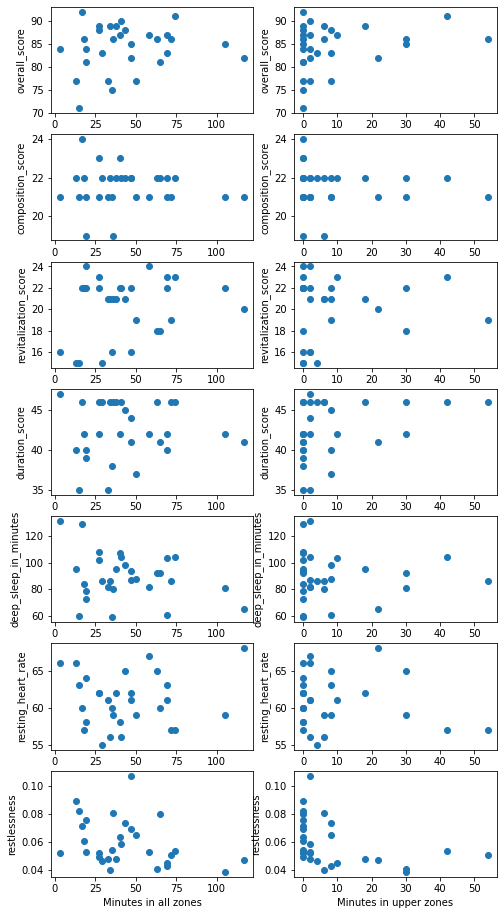

In [38]:
plt.figure(figsize=(8, 16))
plt.subplot(7,2,1)
plt.subplot(7,2,2)
plt.subplot(7,2,3)
plt.subplot(7,2,4)
plt.subplot(7,2,5)
plt.subplot(7,2,6)
plt.subplot(7,2,7)
plt.subplot(7,2,8)
plt.subplot(7,2,9)
plt.subplot(7,2,10)
plt.subplot(7,2,11)
plt.subplot(7,2,12)
plt.subplot(7,2,13)
plt.subplot(7,2,14)

plt.subplot(7,2,1)
plt.scatter(combined['total heart zones'], combined['overall_score'])
plt.xlabel('Minutes in all zones')
plt.ylabel('overall_score')

plt.subplot(7,2,2)
plt.scatter(combined["upper heart zones"], combined['overall_score'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('overall_score')

plt.subplot(7,2,3)
plt.scatter(combined['total heart zones'], combined['composition_score'])
plt.xlabel('Minutes in all zones')
plt.ylabel('composition_score')

plt.subplot(7,2,4)
plt.scatter(combined["upper heart zones"], combined['composition_score'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('composition_score')

plt.subplot(7,2,5)
plt.scatter(combined['total heart zones'], combined['revitalization_score'])
plt.xlabel('Minutes in all zones')
plt.ylabel('revitalization_score')

plt.subplot(7,2,6)
plt.scatter(combined["upper heart zones"], combined['revitalization_score'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('revitalization_score')

plt.subplot(7,2,7)
plt.scatter(combined['total heart zones'], combined['duration_score'])
plt.xlabel('Minutes in all zones')
plt.ylabel('duration_score')

plt.subplot(7,2,8)
plt.scatter(combined["upper heart zones"], combined['duration_score'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('duration_score')

plt.subplot(7,2,9)
plt.scatter(combined['total heart zones'], combined['deep_sleep_in_minutes'])
plt.xlabel('Minutes in all zones')
plt.ylabel('deep_sleep_in_minutes')

plt.subplot(7,2,10)
plt.scatter(combined["upper heart zones"], combined['deep_sleep_in_minutes'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('deep_sleep_in_minutes')

plt.subplot(7,2,11)
plt.scatter(combined['total heart zones'], combined['resting_heart_rate'])
plt.xlabel('Minutes in all zones')
plt.ylabel('resting_heart_rate')

plt.subplot(7,2,12)
plt.scatter(combined["upper heart zones"], combined['resting_heart_rate'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('resting_heart_rate')

plt.subplot(7,2,13)
plt.scatter(combined['total heart zones'], combined['restlessness'])
plt.xlabel('Minutes in all zones')
plt.ylabel('restlessness')

plt.subplot(7,2,14)
plt.scatter(combined["upper heart zones"], combined['restlessness'])
plt.xlabel('Minutes in upper zones')
plt.ylabel('restlessness')

Overall, it appears that we don't yet have enough data to make a judgement about how minutes spent in cardio affect my sleep.